# **Predicting Employee Absenteeism From Work**

# Abstract
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil

Absenteeism is a habitual pattern of absence from a duty or obligation without good reason. Generally, absenteeism is unplanned absences. If a workplace exhibits a high degree of absenteeism there is a problem. It has been viewed as an indicator of poor individual performance, as well as a breach of an implicit contract between employee and employer.

# **Problem Statement**
Today's work environment has a lot of problems including:


*   Managers setting unachievable goals
*   Competition among industries
*   high risk of being unemployed

As a result, employees are likely to face huge pressure and work stress which has effect on employee health




**Aim of the portfolio**

To predict hours of Absenteeism at work using the features provided in the data set with information like:
* How far they live from their workplace.
* How many children and pets they have.
* Do they have higher education?

**Data source**
UCI Machine Learning Repository

**Basic Imports**

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [83]:
import os

cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in 'e:\\userportal\\vinnie\\My-Portfolio': ['.git', '.vscode', 'Absenteeism_at_work.csv', 'Absenteeism_at_work.xls', 'predicting_employee_absenteeism.ipynb', 'README.md']


In [84]:
pip install xlrd


# Loading the data set

In [85]:
Data = pd.read_excel('E:\\userportal\\vinnie\\My-Portfolio\\Absenteeism_at_work.xls')
Data.head() #visualizing the first and last few rows


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


# Basic Analysis

In [86]:
Data.tail()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271219,...,0,1,1,0,0,1,77,175,25,0


In [87]:
Data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [88]:
#get the names of the columns
Data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [89]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [90]:
#Summary data cleaning - figurin out in a table
checking = []

for i in Data.columns:
    checking.append([
        i,
        Data[i].dtypes,
        Data[i].isna().sum(),
        round((((Data[i].isna().sum() )/ len(Data)) * 100),2),
        Data[i].nunique(),
        Data[i].drop_duplicates().sample(2).values
    ])
pd.DataFrame(data = checking,
            columns = [
                'Features',
                'Data_type',
                'Null',
                'Null_percentage',
                'Unique',
                'Unique_sample'
            ])

,Features,Data_type,Null,Null_percentage,Unique,Unique_sample
0,ID,int64,0,0.0,36,"[6, 9]"
1,Reason for absence,int64,0,0.0,28,"[5, 19]"
2,Month of absence,int64,0,0.0,13,"[10, 0]"
3,Day of the week,int64,0,0.0,5,"[4, 3]"
4,Seasons,int64,0,0.0,4,"[4, 3]"
5,Transportation expense,int64,0,0.0,24,"[260, 369]"
6,Distance from Residence to Work,int64,0,0.0,25,"[13, 35]"
7,Service time,int64,0,0.0,18,"[15, 9]"
8,Age,int64,0,0.0,22,"[49, 46]"
9,Work load Average/day,int64,0,0.0,38,"[261756, 284031]"


In [91]:
Data.isna()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

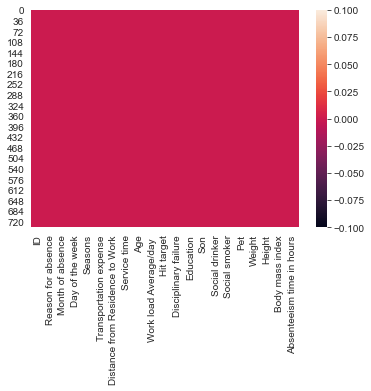

In [92]:
sns.heatmap(Data.isnull())

As seen in the above summary there are no null values and there will be no steps to impute or delete some rows or columns

# Exploratory Data analysis

In [93]:
#Get the unique values values with their maximum and minimum 
for column in Data.columns:
    print(f"===============Column: {column}==============")
    print(f"Number of unique values: {Data[column].nunique()}")
    print(f"Max: {Data[column].max()}")
    print(f"Min: {Data[column].min()}")

===============Column: ID==============
Number of unique values: 36
Max: 36
Min: 1
===============Column: Reason for absence==============
Number of unique values: 28
Max: 28
Min: 0
===============Column: Month of absence==============
Number of unique values: 13
Max: 12
Min: 0
===============Column: Day of the week==============
Number of unique values: 5
Max: 6
Min: 2
===============Column: Seasons==============
Number of unique values: 4
Max: 4
Min: 1
===============Column: Transportation expense==============
Number of unique values: 24
Max: 388
Min: 118
===============Column: Distance from Residence to Work==============
Number of unique values: 25
Max: 52
Min: 5
===============Column: Service time==============
Number of unique values: 18
Max: 29
Min: 1
===============Column: Age==============
Number of unique values: 22
Max: 58
Min: 27
===============Column: Work load Average/day ==============
Number of unique values: 38
Max: 378884
Min: 205917
===============Column: Hit target

In [94]:
#shape of the data set
print("The shape of the data is:{}" .format(Data.shape))

The shape of the data is:(740, 21)


In [95]:
#Data types
print('Data types of the data set is:{}'.format(Data.dtypes))

Data types of the data set is:ID                                 int64
Reason for absence                 int64
Month of absence                   int64
Day of the week                    int64
Seasons                            int64
Transportation expense             int64
Distance from Residence to Work    int64
Service time                       int64
Age                                int64
Work load Average/day              int64
Hit target                         int64
Disciplinary failure               int64
Education                          int64
Son                                int64
Social drinker                     int64
Social smoker                      int64
Pet                                int64
Weight                             int64
Height                             int64
Body mass index                    int64
Absenteeism time in hours          int64
dtype: object


In [96]:
#Duplicated values
Data.duplicated().sum()

34

In [97]:
Data[Data.duplicated()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
16,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
68,34,23,10,3,4,118,10,10,37,253465,...,0,1,0,0,0,0,83,172,28,3
88,28,23,11,4,4,225,26,9,28,306345,...,0,1,1,0,0,2,69,169,24,1
109,10,22,12,4,4,361,52,3,28,261306,...,0,1,1,1,0,4,80,172,27,8
127,34,27,1,2,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,2
128,34,27,1,3,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,2
131,34,27,1,4,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,2
132,27,23,1,5,2,184,42,7,27,308593,...,0,1,0,0,0,0,58,167,21,2
133,34,27,1,5,2,118,10,10,37,308593,...,0,1,0,0,0,0,83,172,28,2
305,5,23,10,2,4,235,20,13,43,265017,...,0,1,1,1,0,0,106,167,38,2


In [98]:
Data = Data.drop_duplicates(keep="first").reset_index()

In [99]:
Data.shape

(706, 22)

In [100]:
#Check the number of employees in the company using their unique IDs
Data["ID"].unique()

array([11, 36,  3,  7, 10, 20, 14,  1, 24,  6, 33, 18, 30,  2, 19, 27, 34,
        5, 15, 29, 28, 13, 22, 17, 31, 23, 32,  9, 26, 21,  8, 25, 12, 16,
        4, 35], dtype=int64)

We have 35 employees

However this column does not carry any numeric information but its only a label variable (a number that is there to distinguish the individuals from one another, not to carry any numeric information) same as index

# Remove Irrelevant faetures

In [101]:
Data.drop(Data["ID"], inplace=True)

# Remove features if they have more than 80% correlation

In [102]:
def correlation(Data, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = Data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


corr_features = correlation(Data, 0.9)
len(set(corr_features))

1

In [103]:
corr_features


{'Body mass index'}

We therefore drop Body mass index since it has correlation more than 90%

In [104]:
Data.drop(['Body mass index'], axis=1, inplace=True)

Pet is more objective than subjective.
Month of absence, Day of the week', 'Seasons', we are looking for the number of absences and not a period of absences.
Weight,Height',are very subjective data, for our analysis it will not influence the number of absences
we are not analyzing reasons for absences hence we can also delete reasons for absence
Month of absence, Day of the week', 'Seasons', we are looking for the number of absences and not a period of absences;

In [105]:
#Data.drop(['Month of absence','Seasons','Reason for absence','Month of absence','Hit target','Pet', 'Weight','Height'], axis=1, inplace=True )

In [106]:
Data["Absenteeism time in hours"].unique()

array([  4,   8,   2,   3,  32,   0,   1,   5,  16,  40,  24,  64,  56,
        80, 120, 112, 104,  48], dtype=int64)

In [107]:
#Average time of absenteeism at work
Data["Absenteeism time in hours"].mean()

7.152238805970149

In [108]:
Data[Data['Day of the week']==7]['Absenteeism time in hours'].mean()

nan

Observe reasons for absence

In [109]:
Data["Absenteeism time in hours"].unique()

array([  4,   8,   2,   3,  32,   0,   1,   5,  16,  40,  24,  64,  56,
        80, 120, 112, 104,  48], dtype=int64)

- 0: 'Unknown',
- 2: 'Neoplasms',
- 3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
- 4: 'Endocrine, nutritional and metabolic diseases',
- 5: 'Mental and behavioural disorders',
- 6: 'Diseases of the nervous system',
- 7: 'Diseases of the eye and adnexa',
- 8: 'Diseases of the ear and mastoid process',
- 9: 'Diseases of the circulatory system',
- 10: 'Diseases of the respiratory system',
- 11: 'Diseases of the digestive system',
- 12: 'Diseases of the skin and subcutaneous tissue',
- 13: 'Diseases of the musculoskeletal system and connective tissue',
- 14: 'Diseases of the genitourinary system',
- 15: 'Pregnancy, childbirth and the puerperium',
- 16: 'Certain conditions originating in the perinatal period',
- 17: 'Congenital malformations, deformations and chromosomal abnormalities',
- 18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
- 19: 'Injury, poisoning and certain other consequences of external causes',
- 20: 'External causes of morbidity and mortality',
- 21: 'Factors influencing health status and contact with health services',
- 22: 'Patient follow-up',
- 23: 'Medical consultation',
- 24: 'Blood donation',
- 25: 'Laboratory examination',
- 26: 'Unjustified absence',
- 27: 'Physiotherapy',
- 28: 'Dental consultation'


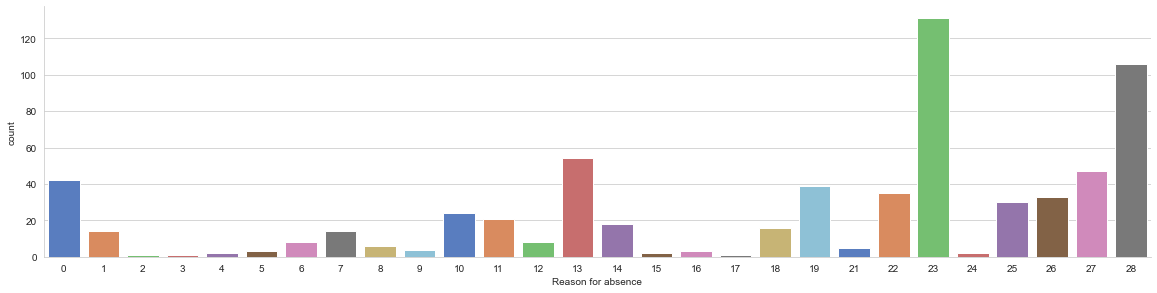

In [110]:
# plot distribution of "reason for absence" column
sns.set_style("whitegrid")
sns.catplot(data=Data, x='Reason for absence', kind= 'count',size=4, aspect=4, palette='muted')

# Absenteeism time wise

<AxesSubplot:xlabel='Reason for absence', ylabel='Absenteeism time in hours'>

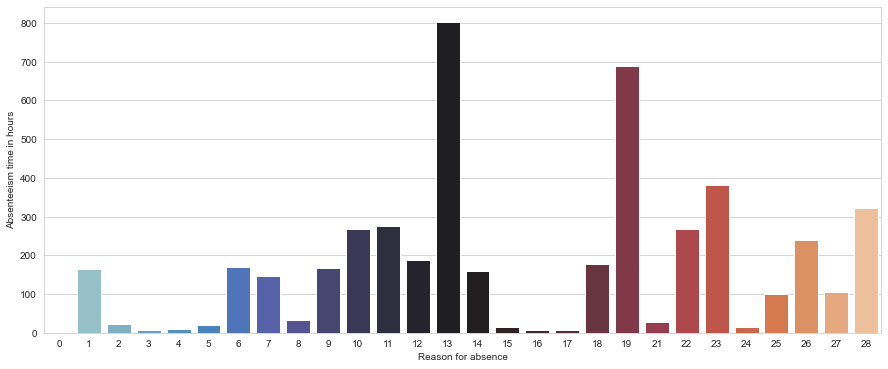

In [111]:

plt.figure(figsize = (15,6))
sns.barplot(Data.groupby(['Reason for absence'])['Absenteeism time in hours'].sum().index, 
            Data.groupby(['Reason for absence'])['Absenteeism time in hours'].sum(), palette="icefire")

# Absenteeism  Time Per Day of The Week And Per Month 

<AxesSubplot:xlabel='Month of absence', ylabel='Absenteeism time in hours'>

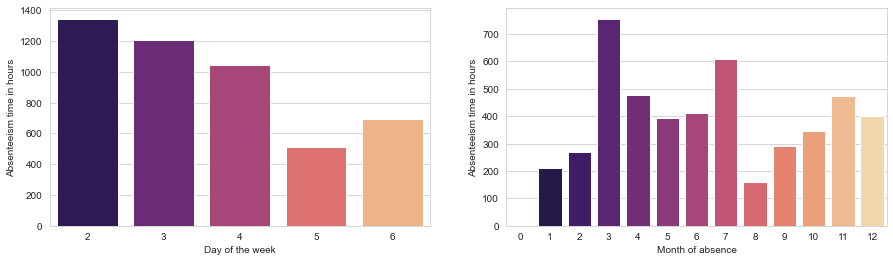

In [112]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
sns.barplot(Data.groupby(['Day of the week'])['Absenteeism time in hours'].sum().index, 
            Data.groupby(['Day of the week'])['Absenteeism time in hours'].sum(), palette="magma")
plt.subplot(1, 2, 2)
sns.barplot(Data.groupby(['Month of absence'])['Absenteeism time in hours'].sum().index, 
            Data.groupby(['Month of absence'])['Absenteeism time in hours'].sum(), palette="magma")

# Absenteeism time - Age and BMI

<AxesSubplot:xlabel='Weight', ylabel='Absenteeism time in hours'>

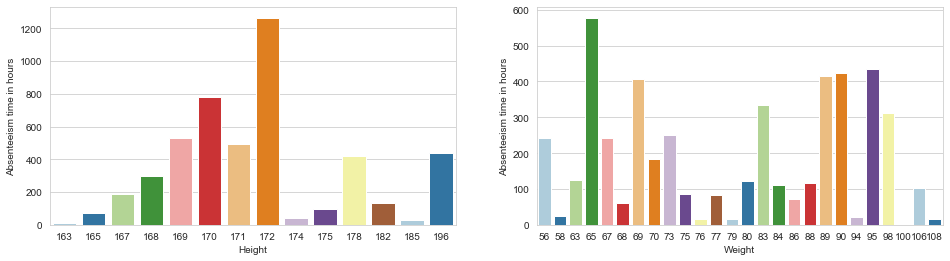

In [113]:
plt.figure(figsize = (16,4))
plt.subplot(1, 2, 1)
sns.barplot(Data.groupby(['Height'])['Absenteeism time in hours'].sum().index, 
            Data.groupby(['Height'])['Absenteeism time in hours'].sum(), palette="Paired")
plt.subplot(1, 2, 2)
sns.barplot(Data.groupby(['Weight'])['Absenteeism time in hours'].sum().index, 
            Data.groupby(['Weight'])['Absenteeism time in hours'].sum(), palette="Paired")

# Absenteeism Education Wise

<AxesSubplot:xlabel='Education', ylabel='Absenteeism time in hours'>

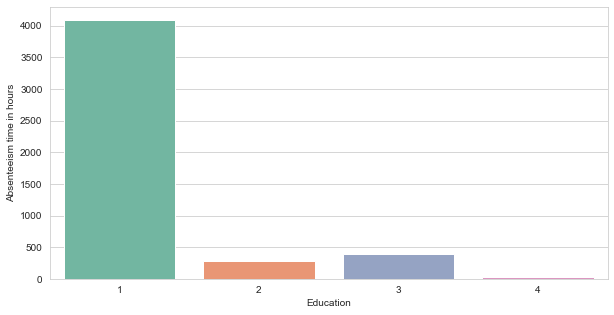

In [114]:
plt.figure(figsize = (10,5))

sns.barplot(Data.groupby(['Education'])['Absenteeism time in hours'].sum().index, 
            Data.groupby(['Education'])['Absenteeism time in hours'].sum(), palette="Set2")

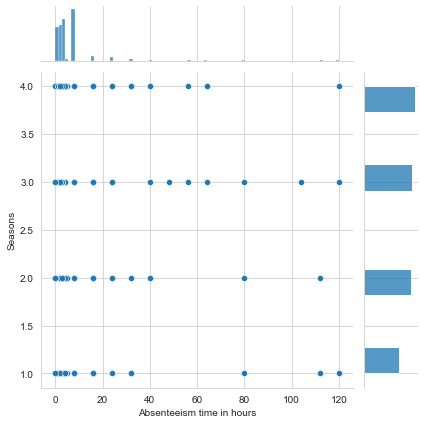

In [115]:
#get the relationship between absenteeism time in hours and seasons
sns.jointplot(x=Data["Absenteeism time in hours"], y=Data["Seasons"],data=Data)

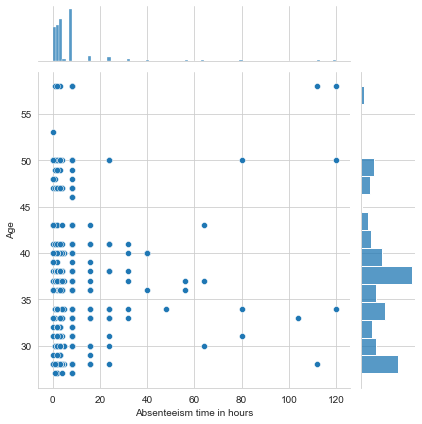

In [116]:
#get the relationship between absenteeism time in hours and Age
sns.jointplot(x=Data["Absenteeism time in hours"], y=Data["Age"],data=Data)

<Figure size 864x432 with 0 Axes>

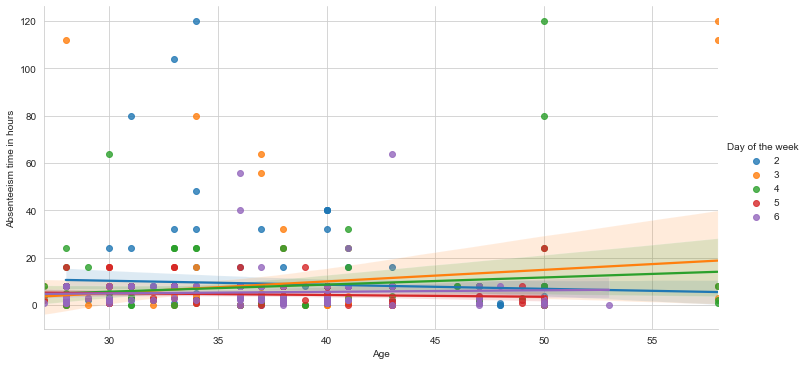

In [117]:
plt.figure(figsize=(12,6))
sns.lmplot(x='Age',y='Absenteeism time in hours',data=Data,hue='Day of the week',size=5,aspect=2)

Separate numerical and categorical data

In [122]:
categorical_vars = ['Reason for absence','Month of absence','Day of the week',
                     'Seasons','Disciplinary failure', 'Education', 'Social drinker',
                     'Social smoker', 'Pet', 'Son']
numerical_vars = Data.drop(columns=categorical_vars).columns.to_list()

In [124]:
# number of unique values in categorical atts
Data[categorical_vars].nunique()

Reason for absence      28
Month of absence        13
Day of the week          5
Seasons                  4
Disciplinary failure     2
Education                4
Social drinker           2
Social smoker            2
Pet                      6
Son                      5
dtype: int64

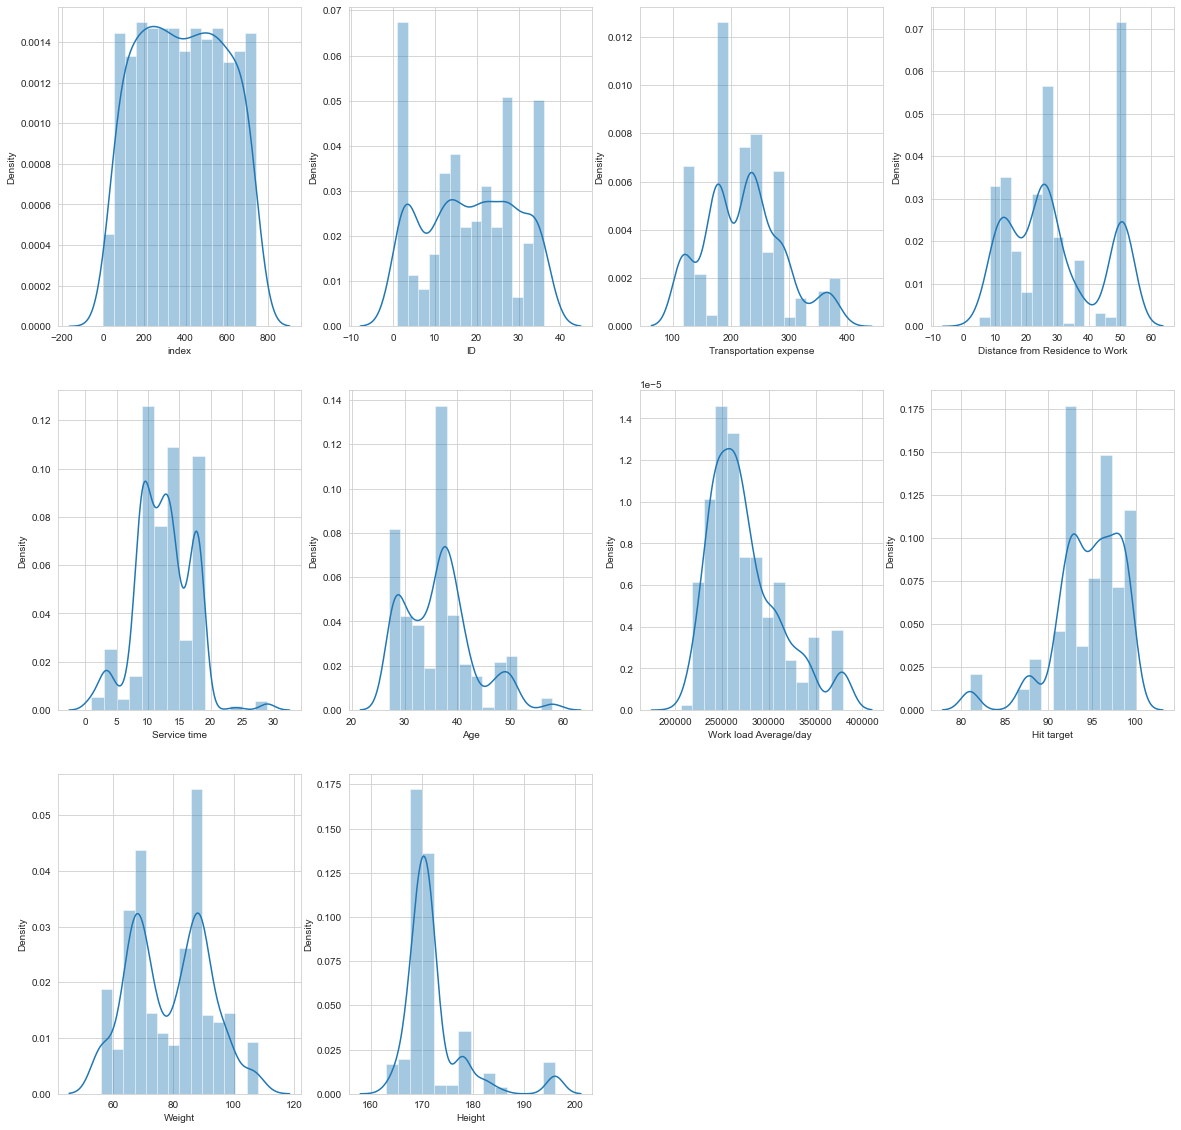

In [125]:
# plot distribution of numerical attributes
num_data = Data[numerical_vars]
plt.figure(figsize=(20,20))
for i in range(1, 11):
    plt.subplot(3, 4, i)
    sns.distplot(num_data[num_data.columns[i-1]],bins=14)

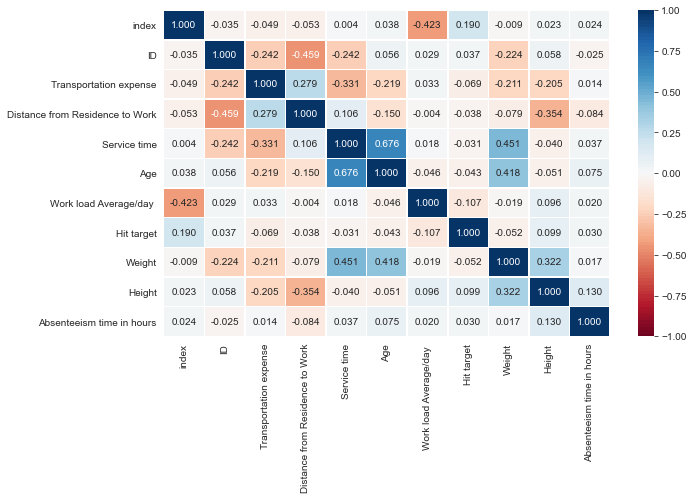

In [126]:
# correlation matrix
num_corr = num_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_corr, annot=True, fmt=".3f",vmin=-1, vmax=1, linewidths=.5, cmap = sns.color_palette("RdBu", 100))
plt.yticks(rotation=0)
plt.show()

In [129]:
len(Data)

670

Outlier detection 

In [127]:
# Check for outliers using boxplots and drop them
for num_at in numerical_vars:
    # Getting 75 and 25 percentile of variable "i"
    Q3, Q1 = np.percentile(Data[num_at], [75,25])
    MEAN = Data[num_at].mean()
    
    # Calculating Interquartile range
    IQR = Q3 - Q1
    
    # Calculating upper extremes and lower extremes
    minimum = Q1 - (IQR*1.5)
    maximum = Q3 + (IQR*1.5)
    
    # Replacing all the outliers value to Mean
    data_clean=Data.drop(Data.loc[Data[num_at]< minimum,num_at].index) 
    data_clean=Data.drop(Data.loc[Data[num_at]> maximum,num_at].index)

In [128]:
len(data_clean)

628

Length reduce from 670 to 628

Normalization